# Project 03 - Analyze A/B Test Results

##### Student Tags

Author: Anderson Hitoshi Uyekita    
Project: Analyze A/B Test Results  
Course: Data Science - Foundations II  
COD: ND111  
Date: 12/01/2019    
Version: 1.0

***

## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
    - [Part I - Probability](#probability)
    - [Part II - A/B Test](#ab_test)
    - [Part III - Regression](#regression)
- [Conclusions](#conclusions)
- [References](#references)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

import seaborn as sns

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Loading the ab_data.csv.
df = pd.read_csv('01-Dataset/ab_data.csv')

# Printing the first 5 rows.
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# Number of rows.
print("Number of rows:", df.shape[0])

Number of rows: 294478


c. The number of unique users in the dataset.

In [4]:
# Number of unique user_id.
print("Number of unique user_id: ", len(df.user_id.unique()))

Number of unique user_id:  290584


d. The proportion of users converted.

In [5]:
# Copying.
df_clean = df.copy()

# Subsetting to remove duplicated user_id.
df_clean = df_clean[np.logical_not(df_clean.user_id.duplicated())]

# Proportion.
sum(df_clean.converted)/len(df_clean)

0.1195695564793657

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# treatment_non_line_up
treatment_non_line_up = df.query("group == 'treatment'").landing_page.value_counts()[1]

In [7]:
# new_age_non_line_up
new_age_non_line_up = df.query("landing_page == 'new_page'").group.value_counts()[1]

In [8]:
# Non line-up
print("Non line-up: ", treatment_non_line_up + new_age_non_line_up)

Non line-up:  3893


f. Do any of the rows have missing values?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 7.9+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
# Subsetting the non line-up. New Page and Treatment
aux_1 = df.query("landing_page == 'new_page'").query("group == 'treatment'")

# Subsetting the non line-up. Old Page and Control.
aux_2 = df.query("landing_page == 'old_page'").query("group == 'control'")

# Appending by rows.
df2 = aux_1.append(aux_2)

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
# Number of unique user_ids
print("Number of Unique user_ids:", df2.user_id.nunique())

Number of Unique user_ids: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
# Number of repeated user_id
print("Number of repeated user_id:", sum(df2.user_id.duplicated()))

Number of repeated user_id: 1


c. What is the row information for the repeat **user_id**? 

In [14]:
# All information about the duplicated user.
df2[df2.user_id.duplicated()].head()

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [15]:
# Repeated User id
df2[df2.user_id.duplicated()].user_id.tolist()[0]

773192

In [16]:
# Landing page of the Repeated user
df2[df2.user_id.duplicated()].landing_page.tolist()[0]

'new_page'

In [17]:
# Group of the repeated User id
df2[df2.user_id.duplicated()].group.tolist()[0]

'treatment'

In [18]:
# Converted of the repeated User id
df2[df2.user_id.duplicated()].converted.tolist()[0]

0

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
# Removing the duplicated user_id
df2 = df2[np.logical_not(df2.user_id.duplicated())]

# Testing.
print("Number of Duplicated user_id:", sum(df2.user_id.duplicated()))

Number of Duplicated user_id: 0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [20]:
# Converting proportion regardless the page.
p_all = sum(df2.converted)/len(df2.converted)

# Printing.
print("Probability:", p_all)

Probability: 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [21]:
# Given it is the control group. What is the converting proportion.
df2.query('group == "control"').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [22]:
# Given it is the treatment group. What is the converting proportion.
df2.query('group == "treatment"').converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [23]:
# Calculating the proportion.
(df2.landing_page == "new_page").mean()

0.5000619442226688

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

In [24]:
# Converting timestamp to date time.
df2['timestamp'] = pd.to_datetime(df['timestamp'])

# Calculating the elapsed time from the beginning to the end.
df2.timestamp.max() - df2.timestamp.min()

Timedelta('21 days 23:59:49.081927')

<a id='answer_probability'></a>

>**Answer:** There is no evidence to support that the new version of the homepage drives a higher conversion rate. Even worse, the control group have performed better results of conversion rates in comparison with the treatment group.
>
>Unfortunately, I do not have much information (a Hypothesis Testing, for instance) only descriptive statistics, but with this preliminary results it is better to keep with the older version.
>
>Bear in mind, this dataset only have data from 22 days, maybe it is too few days for this kind of study, even more, I do not have information about the type of clients have been accessing the website. The older users could have an aversion of this new version of the website and could sabotage it.

***

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

I want to prove the new website has better performance from the older one.

* Null Hypothesis: The old version has better or equal performance than the newer version.
* Alternative Hypothesis: The newer version is better than the older one.

Converting these statments in Hypoteses Testing:

$$H_0: p_{new} - p_{old} \leq 0 $$
$$H_1: p_{new} - p_{old} > 0 \tag{1}$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [25]:
# p_new and p_old are equal according to the instructions.
p_new = df2.converted.mean()

print("p_new: ", p_new)

p_new:  0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [26]:
# p_new and p_old are equal according to the instructions.
p_old = df2.converted.mean()

print("p_old: ", p_old)

p_old:  0.11959708724499628


c. What is $n_{new}$?

In [27]:
# Number of observations when landing_page is equal to new_page.
n_new = df2.query('landing_page == "new_page"').shape[0]

print("n_new: ", n_new)

n_new:  145310


d. What is $n_{old}$?

In [28]:
# Number of observations when landing_page is equal to old_page.
n_old = df2.query('landing_page == "old_page"').shape[0]

print("n_old: ", n_old)

n_old:  145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [29]:
# Drawing a sample for the new_page.
new_page_converted = np.random.choice([1, 0], size = n_new, p = [p_new, (1 - p_new)])

# I have opted to use the np.random.choice, but the np.random.binomial(1, p_new, n_new) will give the same results.

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [30]:
# Drawing a sample for the old_page.
old_page_converted = np.random.choice([1, 0], size = n_old, p = [p_old, (1 - p_old)])

In [6]:
tamanho_amostra = 10
probabilidade_A = 0.5
probabilidade_B= 0.5

np.random.choice(['A', 'B'], size = tamanho_amostra, p = [probabilidade_A, 0,8])




ValueError: a and p must have same size

In [2]:
import numpy as np

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [31]:
# Calculating the difference.
print("p_new - p_old:", p_new - p_old)

p_new - p_old: 0.0


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [32]:
# Initializing variables
p_diffs = []

# Loop to generate 10,000 samples.
for index in range(10000):
    # Sampling the new_page.
    new_page_converted = np.random.choice([1, 0], size= n_new, p= [p_new, (1 - p_new)])
    
    # Sampling the old_page.
    old_page_converted = np.random.choice([1, 0], size= n_old, p= [p_old, (1 - p_old)])
    
    # Calculating the proportion for new_page.
    sample_p_new = new_page_converted.mean()
    
    # Calculating the proportion for old_page.
    sample_p_old = old_page_converted.mean()
    
    # Calculating the difference.
    sample_diff = sample_p_new - sample_p_old
    
    # Appending to the diff vector.
    p_diffs.append(sample_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

C:\Users\ander\AppData\Local\Programs\Python\Python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


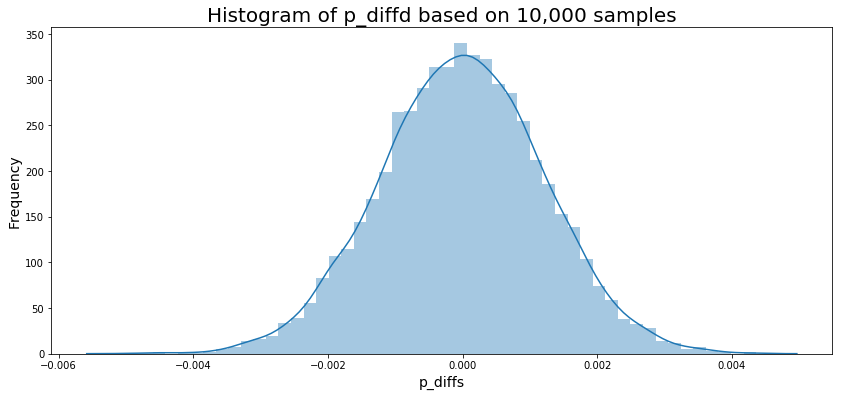

In [33]:
# Plotting a histogram.
plt.figure(figsize = [14,6]) # Histogram size
sns.distplot(p_diffs);          # Using seaborn to plot the Histogram
plt.title('Histogram of p_diffd based on 10,000 samples', fontsize = 20) # Histogram Title
plt.xlabel('p_diffs', fontsize = 14) # X axis labels
plt.ylabel('Frequency', fontsize = 14)      # Y axis labels
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [34]:
# What is the difference between control and treatment?
p_diff = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()

# Priting.
p_diff

-0.0015782389853555567

In [35]:
# Calculating the p-value.
p_value = (np.array(p_diffs) > p_diff).mean()

# Copying to a future use
p_value_j = p_value.copy()

# Priting p-value
print("p-value:", p_value)

p-value: 0.9022


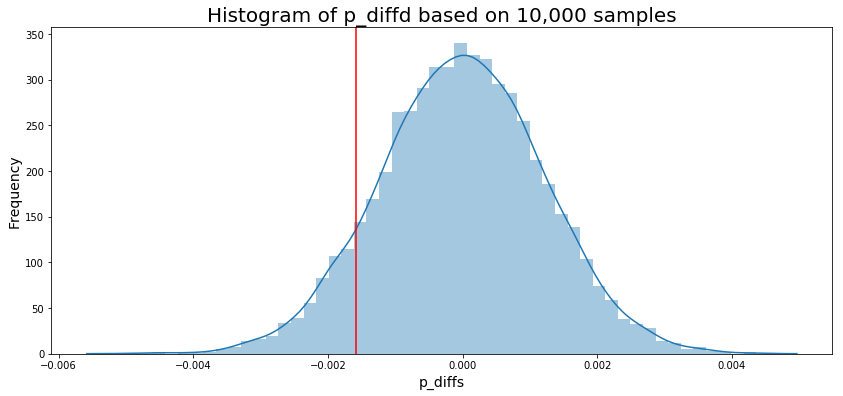

In [36]:
# Plotting a histogram.
plt.figure(figsize = [14,6]) # Histogram size
sns.distplot(p_diffs);          # Using seaborn to plot the Histogram
plt.title('Histogram of p_diffd based on 10,000 samples', fontsize = 20) # Histogram Title
plt.xlabel('p_diffs', fontsize = 14) # X axis labels
plt.ylabel('Frequency', fontsize = 14)      # Y axis labels
plt.axvline(p_diff, color = 'red')
plt.show()

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

>**Answer:** This proportion is also known as `p-value`, this proportion is the key when you are performing a Hypothesis Testing because it explains if the null hypothesis should be rejected or if we fail to reject the null hypothesis.
>
>In the above example, the `p-value` is quite high (0.9037) and it is also greater than the $\alpha$ (0.05).
>
>Due to `p-value` > $\alpha$, we have failed to reject the null hypothesis, in other words, **keep the old version of the website, because this one has better performance than the new version**.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [37]:
len(df2.query('landing_page == "old_page"').landing_page)

145274

In [38]:
import statsmodels.api as sm

# Number of observations with characteristics: landing page equal to old_page and converted flaged 1.
convert_old = len(df2.query('landing_page == "old_page"').query('converted == 1').converted)
# Number of observations with characteristics: landing page equal to new_page and converted flaged 1.
convert_new = len(df2.query('landing_page == "new_page"').query('converted == 1').converted)
# Number of observations with characteristics: landing page equal to old_page.
n_old = len(df2.query('landing_page == "old_page"').landing_page)
# Number of observations with characteristics: landing page equal to new_page.
n_new = len(df2.query('landing_page == "new_page"').landing_page)

In [39]:
# Priting.
print("convert_old:", convert_old)
print("n_old:", n_old)
print("convert_new:", convert_new)
print("n_new:", n_new)

convert_old: 17489
n_old: 145274
convert_new: 17264
n_new: 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

#### Reading

From the [knowledgetack.com][knowledgetack] I have realized the similarities from the Project and the content of this site.

>Imagine you run a website and you are comparing two different landing pages. Landing page 1 had 135 successful cart checkout events out of 1,781 visits and landing page 2 had 47 successful cart checkout events out of 1,443 visits. When someone visits either landing page, they either checkout or not. This makes the problem binomial so we can compare the two proportions to see if one landing page might be better than another. --- <cite>[http://knowledgetack.com/][knowledgetack]</cite>

Unfortunately, the Hypothesis posed by the knowledgetack author is different of this project.

$$H_0: p_{new} - p_{old} \leq 0 $$
$$H_1: p_{new} - p_{old} > 0 \tag{1}$$  

I have read in [statsmodels][url_explanation_alternative] website a explanation in how to use the `stats.proportions_ztest`.

>alternative (string in ['two-sided', 'smaller', 'larger']) – The alternative hypothesis can be either two-sided or one of the one- sided tests, smaller means that the alternative hypothesis is prop < value and larger means prop > value. In the two sample test, smaller means that the alternative hypothesis is p1 < p2 and **larger means p1 > p2 where p1 is the proportion of the first sample and p2 of the second one**. --- <cite>[https://www.statsmodels.org/][url_explanation_alternative]</cite>

From the above excerpt, I will adopt `larger` to my calculations.

>Using the `proportions_ztest` from `statsmodels`, it returns a `z-score` and a `p-value`. By default, `proportions_ztest` has a parameter **alternative= 'two-sided'** which checks for the difference between. --- <cite>[http://knowledgetack.com/][knowledgetack]</cite>

#### Preparation

The function for `proportions_ztest` is:

```
proportions_ztest(count, nobs, value=None, alternative= 'larger', prop_var=False)
```

For this project:

* alternative = 'larger';
* number of success are: 17264 and 17489 , and;
* number of trials: 145310 and 145274.

```
count = [17264, 17489]
nobs = [145310, 145274]
```

#### Application

[knowledgetack]: http://knowledgetack.com/python/statsmodels/proportions_ztest/
[url_explanation_alternative]: https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html

In [40]:
# Number of success in convertion.
count = [convert_new, convert_old]

# Number of trials.
nobs = [n_new, n_old]

# Type of the hypothesis.
alternative = 'larger'

# Calculating the z_score and p_values.
z_score, p_value = sm.stats.proportions_ztest(count = count, nobs = nobs, alternative = alternative)

# Printing.
print("z_score: {}\np_value: {}".format(z_score, p_value))

z_score: -1.3109241984234394
p_value: 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Founded on a significance level of 95% ($\alpha$ equal to 0.05) and a one-tailed test (right-sided test).

In [41]:
from scipy.stats import norm

# Tells us how significant our z-score is
cdf = norm.cdf(z_score)

# For a right sided test test with 95% of confidence level.
ppf = norm.ppf(1 - (0.05))

print("cdf: {}\nppf: {}".format(cdf, ppf))

cdf: 0.09494168724097551
ppf: 1.6448536269514722


In [42]:
# p_value calculated using the proportions_ztest
print("p_value:", round(p_value,4))
# p_value calculated in item j.
print("p_value_j:", p_value_j)

p_value: 0.9051
p_value_j: 0.9022


In [43]:
print("z_score:", z_score)
print("ppf:", ppf) # As expected given alpha = 0.05 the ppf is 1.6448
print("\nz_score > ppf :", z_score > ppf) 

z_score: -1.3109241984234394
ppf: 1.6448536269514722

z_score > ppf : False


<a id='answer_abtesting'></a>

>**Answer:** In respect to the `p_value` both values (from j and k items) are very similar (0.90) and there is strong evidence that there is no difference between the new page and the old page.
>
>The `z_score` is smaller than the `ppf` which implies to **fail to reject the null hypothesis** ($H_0$). In other words, there is no evidence that the new page has better performance than the older one.
>
>Comparing results from the j and k items, all results are aligned with the same conclusions.

***

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

In [44]:
# Printing the first 5 rows.
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


>**Answer:** Since the objective is to predict a conversion or not (a classification), the **Logistic Regression** is more appropriate to perform it.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [45]:
# Copying df2 to create a dataframe specific to this project part.
df_logit = df2.copy()

# Adding the Intercept column.
df_logit['intercept'] = 1

# Converting categorical variables in dummies. Bear in mind, to name treatment as ab_page
df_logit[['control','ab_page']] = pd.get_dummies(df_logit['group'])

# Printing the first 5 rows.
df_logit.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [46]:
# Creating an object.
lm_logit = sm.Logit(df_logit['converted'],df_logit[['intercept','ab_page']])

# Calculating the coefficients/Fitting the model.
results = lm_logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [47]:
# Printing the summary.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 17 Jan 2019   Pseudo R-squ.:               8.077e-06
Time:                        21:30:09   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

>**Answer:** Regarding the `p-value` associate with **ab_page**, unfortunately, the `p-value` is greater than the $\alpha$ (assuming 0.05) and for this reason we fail to reject the null hypothesis ($H_0$). Put differently, there is no statistical evidence that the new page has better performance than the old version.
>
>$$\text{p-value} > \alpha$$
>$$0.190 > 0.05$$
>
>Recall, in **Part II** I have posed in equation (1) these hypotheses:
>
>$$H_0: p_{new} - p_{old} \leq 0 $$
>$$H_1: p_{new} - p_{old} > 0 \tag{1}$$ 
>
>In this case above the hypotheses are **right tailed test**.
>
>According to Lesson 14, the hypotheses behind the scenes of the OLS/Logit methods are **two-tailed test** as you can see below:
>
>$$ H_0 : intercept = 0 $$
>$$H_1 : intercept \neq 0 \tag{2}$$
>
>Have in mind, the `ab_pages` variable has similar hypotheses.</em>
>
>$$ H_0 : \text{ab_pages} = 0 $$
>$$H_1 : \text{ab_pages} \neq 0 \tag{3}$$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**Answer:** Aggregating new features/variables to the model could be a good idea because this new variable might explain something that is not yet explained, which implies an improvement in the model.
>
>Although adding new features increase the R-Squared and the overall quality of the model, this action might have some drawback:
>
>* Perhaps you are improving the overall quality but you are also adding multicollinearity;
>
> You can also add higher orders terms, which also enhance the overall model. The disadvantages of this approach:
>
>* Complexity to interpret the model.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

In [48]:
# Loading the Countries Dataframe.
df_countries = pd.read_csv('01-Dataset/countries.csv')

# Printing the first 5 rows.
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


#### Categories of country

In [49]:
# How many countries there are in country column?
df_countries.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

#### Duplicated user_id

In [50]:
# No duplicated user_id.
print("Duplicated user_id:", sum(df_countries.duplicated()))

Duplicated user_id: 0


#### Merging Data Frames

Here I will bind the df_logit and df_countries using the `user_id` as a key.

In [51]:
# Using the pandas merge method to bind these two dataframes.
df_merge = pd.merge(df_logit, df_countries, on = 'user_id')

# Printing the first 5 rows of df_clean_countries
df_merge.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page,country
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1,CA
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1,UK
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,1,CA


#### Creating the Dummies Variables

As you can see the `country` should be converted in two columns.

The baseline for the `converted` column is `control`, and I will adopt `US` as baseline for `country`

In [52]:
# Creating the Dummies variables for country column.
df_merge[['CA','UK','US']] = pd.get_dummies(df_merge['country'])

# Printing
df_merge.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page,country,CA,UK,US
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US,0,0,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US,0,0,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1,CA,1,0,0
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1,UK,0,1,0
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,1,CA,1,0,0


#### Converting rates by country

In [53]:
# Conversion rating by country.
convert_CA = df_merge[df_merge.CA.astype(bool)].converted.mean()
convert_UK = df_merge[df_merge.UK.astype(bool)].converted.mean()
convert_US = df_merge[df_merge.US.astype(bool)].converted.mean()

# Conversion rate by country.
print("Conversion US:", round(convert_US,4))
print("Conversion UK:", round(convert_UK,4))
print("Conversion CA:", round(convert_CA,4))

Conversion US: 0.1195
Conversion UK: 0.1206
Conversion CA: 0.1153


#### Dropping baseline variables

In [54]:
# Dropping unnecessary columns.
df_clean = df_merge.drop(['control', 'country', 'US'], axis = 1)

# Printing the first 5 rows of the cleaned dataframe.
df_clean.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,1,0
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,0,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,1,0


In [55]:
# Creating the object.
lm_logit_country = sm.Logit(df_clean['converted'],df_clean[['intercept','CA','UK']])

# Fitting the model/Calculating the coefficients.
results_country = lm_logit_country.fit()

# Printing the summary.
results_country.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 17 Jan 2019   Pseudo R-squ.:               1.521e-05
Time:                        21:30:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

Founded on the coefficients calculated.

$$\text{logit}(p) = \log(\frac{p}{1-p}) = \beta_0 + \beta_1 \cdot UK + \beta_2 \cdot CA \tag{4}$$

Where:

* $\beta_0:$ -1.9967
* $\beta_1:$ 0.0099
* $\beta_2:$ -0.0408

This coefficients could also be calculated creating Table 1.  

<br>

<center><strong>Table 1 - Number of conversion by country.</strong></center>

|Converted|US|UK|CA|Total|
|:-:|:-:|:-:|:-:|:-:|
|0|179,277|63,727|12,827|255,831|
|1|24,342|8,739|1,672|34,753|
|Total|203,619|72,466|14,499|290,584|

In [56]:
#Initializing the table_1
table_1 = {}

# Printing the values from the Table 1. First Row.
row_1 = df_merge.query('converted == "0"').country.value_counts()

# Printing the values from the Table 1. Seconf Row.
row_2 = df_merge.query('converted == "1"').country.value_counts()

# Adding rows to the table_1
table_1['0'] = row_1
table_1['1'] = row_2

# Converting dictionary to Dataframe.
table_1 = pd.DataFrame(table_1)

# Adding total column.
table_1['Total'] = table_1['0'] + table_1['1']

# Transposing to be equal to the Table 1 (above).
table_1 = table_1.transpose()

# Adding other total column.
table_1['Total'] = table_1['US'] + table_1['UK'] + table_1['CA']

# Printing.
table_1

,US,UK,CA,Total
0,179277,63727,12827,255831
1,24342,8739,1672,34753
Total,203619,72466,14499,290584


Let's calculate the ratio of converted and non-converted by country.

$$ratio_{us} = \frac{24342}{179277} = 0.135778711$$

$$ratio_{uk} = \frac{8739}{63727} = 0.137131828$$

$$ratio_{ca} = \frac{1672}{12827} = 0.130350043$$

Bear in mind, these relations above are different from the `convert_CA`, `convert_US`, and `convert_UK`.

The $ratio_{us}$, $ratio_{uk}$, and $ratio_{ca}$ try to explain for each non-converted how many convert it yields. 

In [57]:
# Calculating the ratio converted/non_converted by country.
ratio_us, ratio_uk, ratio_ca = row_2/row_1

# Printing.
print("ratio_us:", ratio_us)
print("ratio_uk:", ratio_uk)
print("ratio_ca:", ratio_ca)

ratio_us: 0.13577871115647852
ratio_uk: 0.13713182795361464
ratio_ca: 0.13035004287830357


I have adopt `US` as the baseline, for this reason I will divide the $ratio_{uk}$ and $ratio_{ca}$ by $ratio_{us}$.

$$\beta_0 = \ln(ratio_{us}) = -1.996728842$$

$$\beta_1 = \ln \begin{pmatrix} \frac{ratio_{uk}}{ratio_{us}} \end{pmatrix} = 0.009916274$$

$$\beta_2 = \ln \begin{pmatrix} \frac{ratio_{ca}}{ratio_{us}} \end{pmatrix} = -0.040802967$$

[I have consulted this reference to answer this item.][stats_ref]

[stats_ref]: https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

In [58]:
# Calculation of betas.
print("beta_0:", np.log(ratio_us))
print("beta_1:", np.log(ratio_uk/ratio_us))
print("beta_2:", np.log(ratio_ca/ratio_us))

beta_0: -1.996728842299227
beta_1: 0.00991627431814299
beta_2: -0.040802967355976695


Founded on the $ratio_{uk}$, $ratio_{ca}$, and $ratio_{us}$ I can draw some conclusions using the relationship between $ratio_{us}$ (my baseline) and the other.

In [59]:
# Printing.
print("ratio_uk/ratio_us:", round(ratio_uk/ratio_us, 4))
print("ratio_ca/ratio_us:", round(ratio_ca/ratio_us, 4))

ratio_uk/ratio_us: 1.01
ratio_ca/ratio_us: 0.96


#### Interpretation

Recall, the baseline is `US`, so all the interpretation is based on the `US`.

* This fitted model says that, holding `CA` at a fixed value, the odds of getting into an `converted` (converted = 1) for `UK`(country = UK) over the odds of getting into an non-converted for `US` (country = US) is exp(0.0099) = 1.01. In terms of percent change, we can say that the odds for `UK` are 1% higher than the odds for `US`.

* Holding `UK` at a fixed value, the odds of getting into an `converted` (converted = 1) for `CA`(country = CA) over the odds of getting into an non-converted for `US` (country = US) is exp(-0.0408) = 0.96. In terms of percent change, we can say that the odds for `CA` are 4% lower than the odds for `US`.

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

>Assuming $\alpha$ equal to 0.05.
>
>**Answer:** Both dummies variables, `CA` and `UK`, are not significant because the `p-value` is greater than the $\alpha$. For this reason, the model fails to reject the null hypothesis, which reinforces the strong evidence that the country does not affect in conversion rate.
>
>Despite the fact of being significant or not, the effect of these three variables (`US`, `CA` and `UK`) do not have much influence in the conversion rate. Recall, in a condition of [ceteris paribus][ceteris] the `UK` going to have only 1% more than the odds of `US`. On the other hand, also in [ceteris paribus][ceteris], `CA` going to have 4% less than the odds of `US`.

[ceteris]: https://en.wikipedia.org/wiki/Ceteris_paribus

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [60]:
# Creating the object.
lm_logit_complete = sm.Logit(df_clean['converted'],df_clean[['intercept', 'ab_page', 'CA', 'UK']])

# Fitting the model/Calculating the coefficients.
results_complete = lm_logit_complete.fit()

# Printing the summary.
results_complete.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 17 Jan 2019   Pseudo R-squ.:               2.323e-05
Time:                        21:30:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [61]:
# Effect of each variale. Baseline: US and control.
round(np.exp(results_complete.params[1:]), 2)

ab_page    0.99
CA         0.96
UK         1.01
dtype: float64

#### Interpretation

Aggregating a new term in the Logistic Regression have not changed the "old" coefficients, for this reason, I will only give only an interpretation of the `ab_page`.

* Holding `CA` and `UK` at a fixed value, the odds of getting into an `converted` (converted = 1) for `ab_page` (group = treatment) over the odds of getting into an non-converted for `control` (group = control) is exp(-0.0149) = 0.99. In terms of percent change, we can say that the odds for `ab_page` (group = treatment) are 1% less than the odds for `control` (group = control).

<a id='answer_regression'></a>

>**Answer:** Since the `p-values` of ab_pages, CA, and UK are greater than $\alpha$ (adopt as 0.05 or 5%), the model fails to reject the hypotheses null. There is no evidence of interaction between conversion rate and country.
>
>Even adding new variables the model still failing to reject the null hypothesis. 

***

## Conclusions <a id='conclusions'></a>

So far we have performed three short studies, Table 2 shows a summary of answers.

<br><center><strong>Table 2 - Summary of answers.</strong></center>

|Section|Subject|Result|Link|
|:-:|:-:|:-:|:-:|
|Part I|Probability|There is no evidence to support that the new<br>version of the homepage drives a higher conversion rate|[Answer](#answer_probability)|
|Part II|A/B Testing|Fail to reject null hypotheses|[Answer](#answer_abtesting)|
|Part III|Regression|Fail to reject null hypotheses|[Answer](#answer_regression)|

Finally, there is no statistical evidence to support a website change. For this reason, I strongly recommend staying with the older version until new evidence from new data.

I have to emphasize in all test performed in this document the model **fail to reject the null hypothesis**.
***

***
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!
***

## References <a id='references'></a>


* Pandas Data Frame Join, [website][ref_01];
* Two-sample Proportion Hypothesis Testing with Statsmodels, [website][ref_02];
* Proportions z-test, [website][ref_03];
* HOW DO I INTERPRET ODDS RATIOS IN LOGISTIC REGRESSION?, [website][ref_04];
* Ceteris Paribus, Wikipedia, [website][ref_05];
* Udacity, ND 111 notebooks, [website][ref_06];
* Library Random, Package Documentation, [website][ref_07];




[ref_01]: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html
[ref_02]: http://knowledgetack.com/python/statsmodels/proportions_ztest/
[ref_03]: https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html
[ref_04]: https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/
[ref_05]: https://en.wikipedia.org/wiki/Ceteris_paribus
[ref_06]: https://www.udacity.com
[ref_07]: https://docs.python.org/2/library/random.html




***

In [62]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0